# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
%matplotlib inline

In [2]:
exc = pd.ExcelFile('Data Analyst Assignment (1).xlsx')
df = pd.read_excel(exc, sheet_name="Assignment-1")
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [3]:
df.shape

(16834, 16)

In [4]:
df.info() #Datatypes of given Dataset and their count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16834 non-null  datetime64[ns]
 1   product               16834 non-null  object        
 2   phase                 16834 non-null  object        
 3   campaign_platform     16834 non-null  object        
 4   campaign_type         16834 non-null  object        
 5   communication_medium  16834 non-null  object        
 6   subchannel            16834 non-null  object        
 7   audience_type         16834 non-null  object        
 8   creative_type         16834 non-null  object        
 9   creative_name         16834 non-null  object        
 10  device                16834 non-null  object        
 11  age                   16834 non-null  object        
 12  spends                16834 non-null  float64       
 13  impressions     

In [5]:
df.describe() #Quantitative variables in the dataset

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


# Converting int type variables to float for further simplifications for our model

In [6]:
df[['impressions', 'clicks']] = df[['impressions', 'clicks']].astype(float) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16834 non-null  datetime64[ns]
 1   product               16834 non-null  object        
 2   phase                 16834 non-null  object        
 3   campaign_platform     16834 non-null  object        
 4   campaign_type         16834 non-null  object        
 5   communication_medium  16834 non-null  object        
 6   subchannel            16834 non-null  object        
 7   audience_type         16834 non-null  object        
 8   creative_type         16834 non-null  object        
 9   creative_name         16834 non-null  object        
 10  device                16834 non-null  object        
 11  age                   16834 non-null  object        
 12  spends                16834 non-null  float64       
 13  impressions     

# Exploratory Data Analysis

# Checking null values in the columns 

In [7]:
df.isnull().sum() #link_clicks have null values

Date                      0
product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

In [8]:
df['link_clicks'].value_counts()   #Here looking at the values we can say that people have not clicked most number of times  

0.0      15101
1.0        233
2.0        104
3.0         87
4.0         64
5.0         47
7.0         43
6.0         31
8.0         30
9.0         27
11.0        24
17.0        18
18.0        18
15.0        17
10.0        16
12.0        16
14.0        15
20.0        14
21.0        14
24.0        13
23.0        13
25.0        12
34.0        10
22.0        10
41.0         9
28.0         9
16.0         9
31.0         8
30.0         8
40.0         7
33.0         7
38.0         7
26.0         7
13.0         7
29.0         6
27.0         6
44.0         6
36.0         6
19.0         6
70.0         6
47.0         5
43.0         5
39.0         5
42.0         4
49.0         4
62.0         4
46.0         4
45.0         4
65.0         3
59.0         3
67.0         3
37.0         3
75.0         3
84.0         3
94.0         3
93.0         3
76.0         3
60.0         3
92.0         3
72.0         3
54.0         3
99.0         2
63.0         2
53.0         2
48.0         2
32.0         2
96.0      

# Replacing missing values with 0 since values of 0 are comparitively much higher in the column, so I preferred to take 0 instead of the mean because it would be unfair to to expect clicking on our ad without any data or proof. 

In [9]:
df['link_clicks'].fillna(0, inplace=True)

In [10]:
df['link_clicks'].value_counts()

0.0      15647
1.0        233
2.0        104
3.0         87
4.0         64
5.0         47
7.0         43
6.0         31
8.0         30
9.0         27
11.0        24
17.0        18
18.0        18
15.0        17
10.0        16
12.0        16
14.0        15
20.0        14
21.0        14
24.0        13
23.0        13
25.0        12
34.0        10
22.0        10
41.0         9
28.0         9
16.0         9
31.0         8
30.0         8
40.0         7
33.0         7
38.0         7
26.0         7
13.0         7
29.0         6
27.0         6
44.0         6
36.0         6
19.0         6
70.0         6
47.0         5
43.0         5
39.0         5
42.0         4
49.0         4
62.0         4
46.0         4
45.0         4
65.0         3
59.0         3
67.0         3
37.0         3
75.0         3
84.0         3
94.0         3
93.0         3
76.0         3
60.0         3
92.0         3
72.0         3
54.0         3
99.0         2
63.0         2
53.0         2
48.0         2
32.0         2
96.0      

# Comparison between number of times customers did normal clicks and link clicks

In [11]:
df['clicks'].count()

16834

In [12]:
df['link_clicks'].count()

16834

# Understanding our Variables and their values

In [13]:
df['product'].value_counts() #This shows that we are only advertising one product

Product 1    16834
Name: product, dtype: int64

In [14]:
df['phase'].value_counts()

Performance    16834
Name: phase, dtype: int64

In [15]:
def categorical_data(name, title):
    fig, axs = plt.subplots(1,2,figsize=(14,7))
    sns.countplot(name, ax=axs[0])
    axs[0].set_title("Frequency distribution of " + title)
    name.value_counts().plot(x = None,y=None,kind = 'pie', ax = axs[1],autopct='%1.2f%%')
    axs[1].set_title('Percentage Distribution of ' + title)
    plt.legend()
    plt.show()

In [16]:
def numeric_data(name):
    fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(14,7))
    sns.distplot(name, ax=ax[0])
    sns.boxplot(name, orient='v', color='r', ax=ax[1])
    plt.show()


In [17]:
df['campaign_platform'].value_counts() #Here it shows that advertisement by Google are much higher than the Facebook. 

Google Ads      15101
Facebook Ads     1733
Name: campaign_platform, dtype: int64

# Here we can see that Google Ads are much more used than Facebook ads to interact with our customers, so we should try to advertise more on Google ads and we should focus more on FB ads to increase their interaction with audience

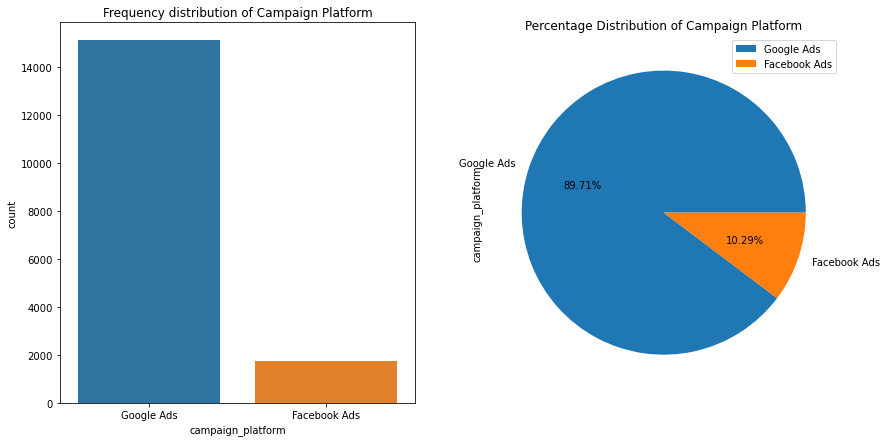

In [18]:
categorical_data(df['campaign_platform'], 'Campaign Platform')

In [19]:
df['campaign_type'].value_counts()

Search         15101
Conversions     1733
Name: campaign_type, dtype: int64

# Here we can see that search campaigns are more compared to the conversion campaigns, people tend to get advertised about our product more through the means of their searching than their browsing conversion.

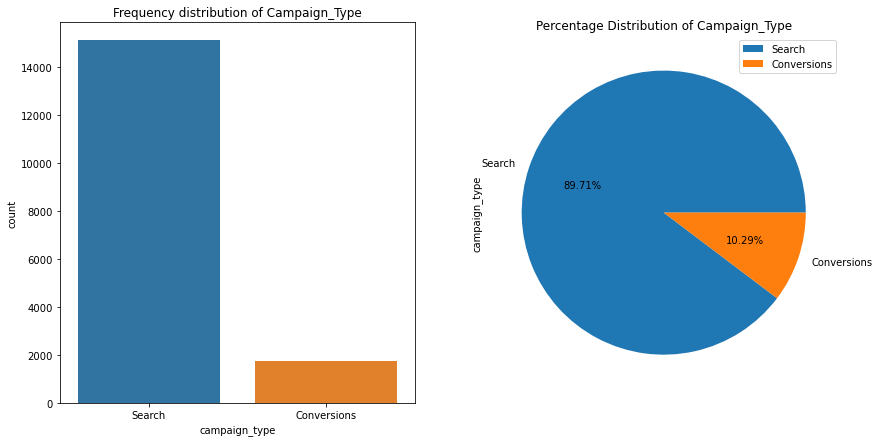

In [20]:
categorical_data(df['campaign_type'], "Campaign_Type")

In [21]:
df['audience_type'].value_counts()

'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64

In [22]:
df['audience_type'].replace({"'-" : 'Unknown_Audience_Type'}, inplace= True)

In [23]:
df['audience_type'].value_counts()

Unknown_Audience_Type    15101
Audience 1                 813
Audience 2                 738
Audience 3                 182
Name: audience_type, dtype: int64

# From the available data, Audience 2 are more interacted compared to the Audience 1 and Audience 3, ignoring the unknown data.

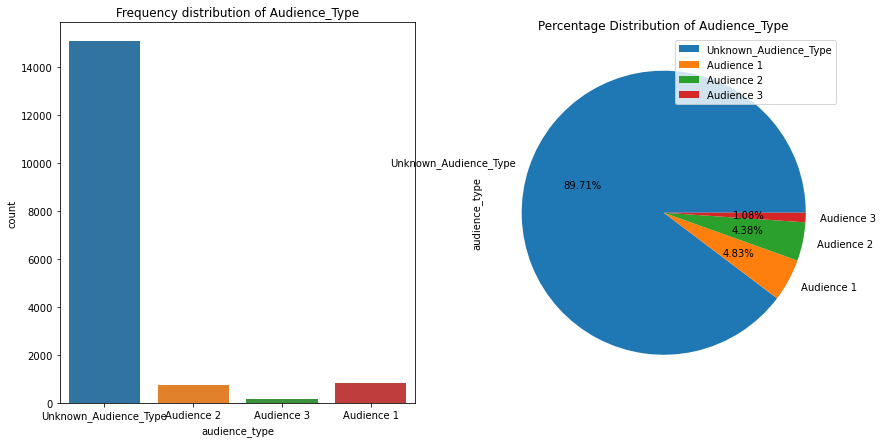

In [24]:
categorical_data(df['audience_type'],"Audience_Type")

In [25]:
df['creative_type'].value_counts()

'-          15101
Image        1130
Carousal      603
Name: creative_type, dtype: int64

# In comparison audience is attracted more towards the Images than the carousal type of advertisements, there may be many factors to this result, since the carousal ads may require more data and time for its showcasing so people might tend to ignore it, therefore images can perform better and faster to interact with audience.

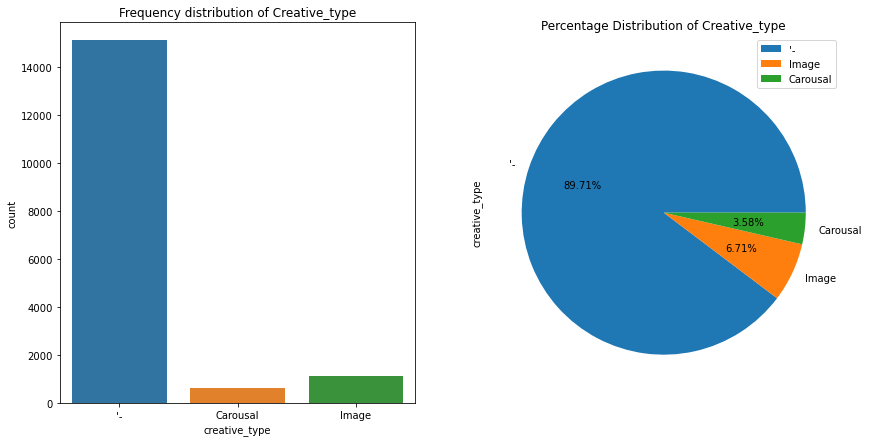

In [26]:
categorical_data(df['creative_type'],"Creative_type")

In [27]:
df['device'].value_counts()

Mobile     7357
Desktop    6318
device     1733
Tablet     1426
Name: device, dtype: int64

# Following graph shows that audience getting interacted with the mobiles more than the Desktop, other devices and tablets.

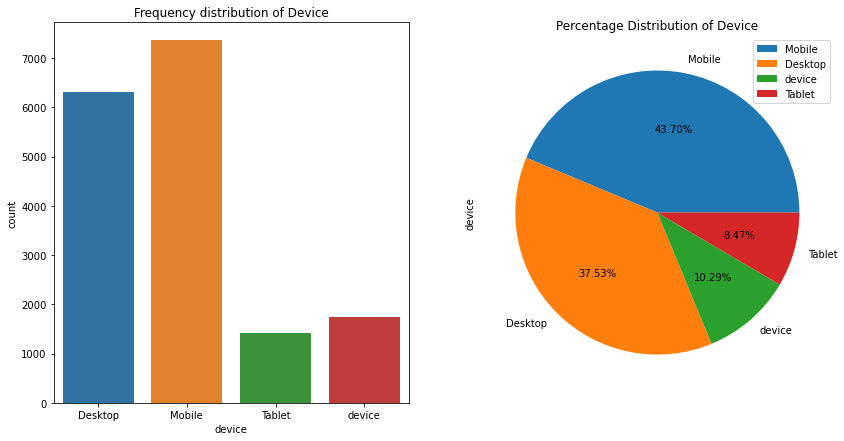

In [28]:
categorical_data(df['device'],"Device")

In [29]:
df['age'].value_counts()

25-34           3097
35-44           2865
Undetermined    2586
45-54           2499
18-24           2472
55-64           1757
65 or more      1558
Name: age, dtype: int64

# Looking at the plotted graph we can clearly see that young age group i.e. below 45 are interested more in our brand, compared to the old age people above 45. Age group of 25-35 are interested more in our product then its followed by age group of 35-45. People above the age of 65 are least interested in our product.


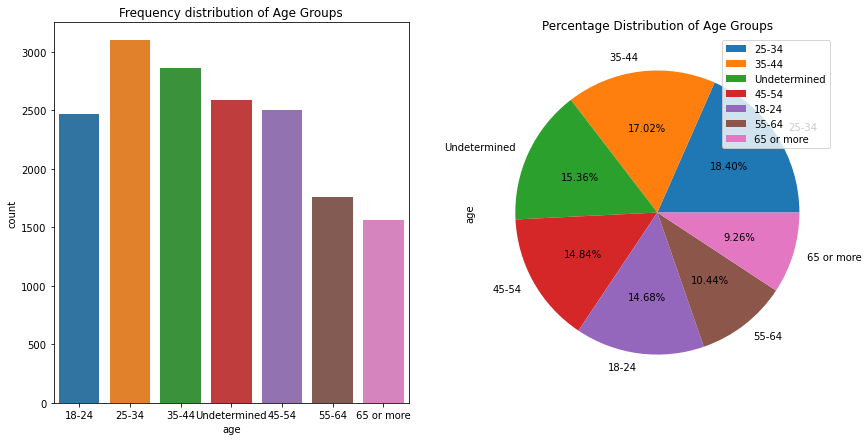

In [30]:
categorical_data(df['age'], "Age Groups")

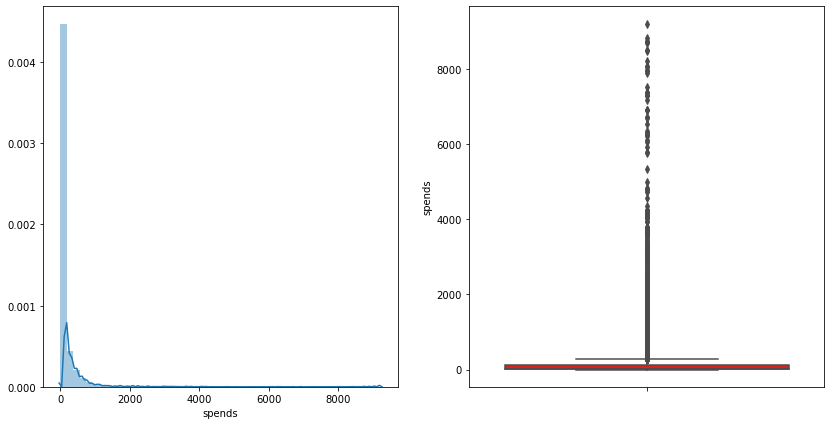

In [31]:
numeric_data(df['spends'])

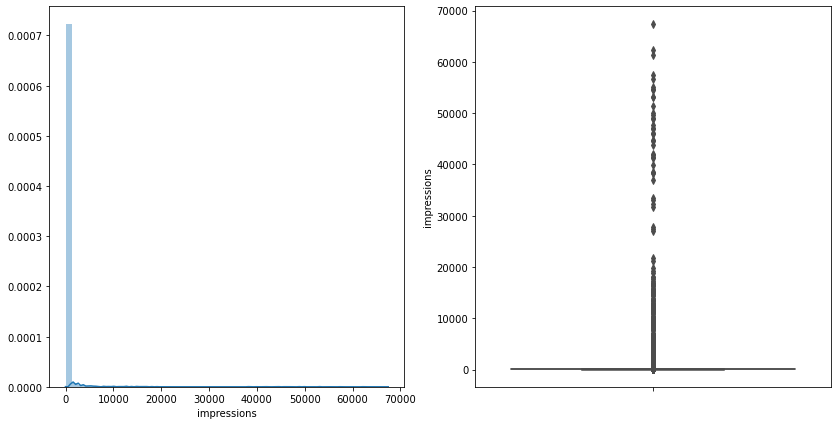

In [32]:
numeric_data(df['impressions'])

# Monthly spends

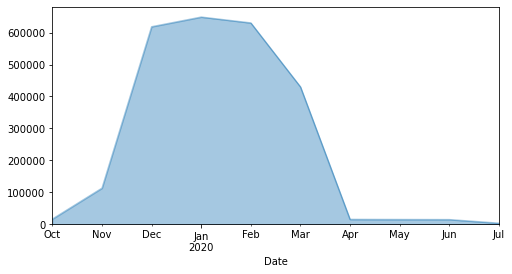

In [33]:
date = df.set_index('Date')
date.resample('MS')['spends'].sum().plot.area(figsize=(8,4),alpha=0.4)

# Relation between clicks and link_clicks

#  Here we can see numbers of clicks and linck_clicks are same, this shows that customers have direct Click to action () in our dataset.

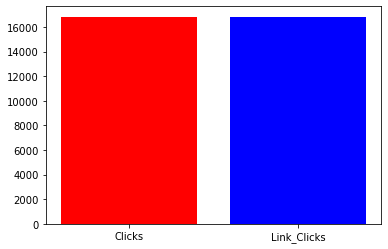

In [34]:
Count = [df['clicks'].count(),df['link_clicks'].count()]
bars = ('Clicks', 'Link_Clicks')
y_pos = np.arange(len(bars))
plt.bar(y_pos, Count, color =('red', 'blue'))
plt.xticks(y_pos, bars)
plt.show()

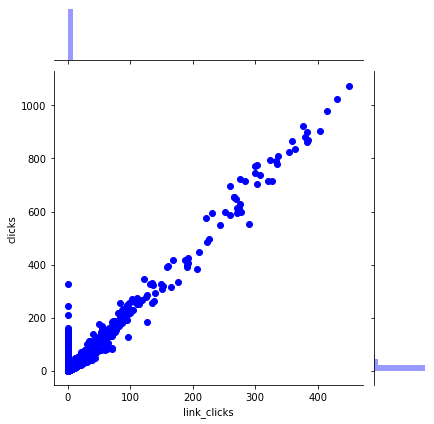

In [35]:
sns.jointplot(x='link_clicks', y= 'clicks', data=df, color='blue')

# Correlation between numeric variables

In [36]:
df.corr()

,spends,impressions,clicks,link_clicks
spends,1.000000,0.744552,0.838371,0.697143
impressions,0.744552,1.000000,0.917512,0.963112
clicks,0.838371,0.917512,1.000000,0.925325
link_clicks,0.697143,0.963112,0.925325,1.000000


# Pairplot of numeric Variables

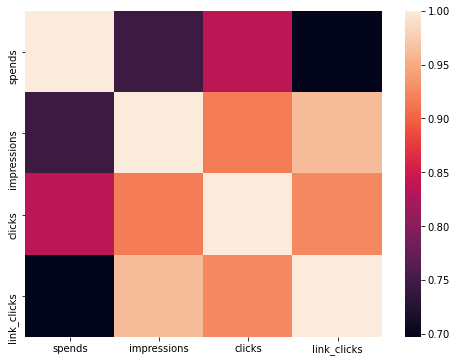

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())
plt.show()

# Here we can say that link_clicks is all we are looking for so we consider link_clicks dependent or target variable and all other independent variables for Model Building

# Since the Product and Phase variables have only one class so it can be eliminated while building our model so that we can get more precise result. Eliminating Date Variable too because it wont be important for our prediction.

In [38]:
df.drop(["Date","product","phase"],axis=1, inplace=True)

# Splitting X and Y

In [39]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

# Encoding Categorical Variables

# Label Encoding Object Variables

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['campaign_platform'] = le.fit_transform (df ['campaign_platform'])
df['campaign_type'] = le.fit_transform (df ['campaign_type'])
df['communication_medium'] = le.fit_transform (df ['communication_medium'])
df['subchannel'] = le.fit_transform (df ['subchannel'])
df['audience_type'] = le.fit_transform (df ['audience_type'])
df['creative_type'] = le.fit_transform (df ['creative_type'])
df['creative_name'] = le.fit_transform (df ['creative_name'])
df['device'] = le.fit_transform (df ['device'])
df['age'] = le.fit_transform (df ['age'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_platform     16834 non-null  int32  
 1   campaign_type         16834 non-null  int32  
 2   communication_medium  16834 non-null  int32  
 3   subchannel            16834 non-null  int32  
 4   audience_type         16834 non-null  int32  
 5   creative_type         16834 non-null  int32  
 6   creative_name         16834 non-null  int32  
 7   device                16834 non-null  int32  
 8   age                   16834 non-null  int32  
 9   spends                16834 non-null  float64
 10  impressions           16834 non-null  float64
 11  clicks                16834 non-null  float64
 12  link_clicks           16834 non-null  float64
dtypes: float64(4), int32(9)
memory usage: 1.1 MB


In [42]:
df.shape

(16834, 13)

# Creating X and Y

In [43]:
X = df.values[:,:-1]
Y = df.values[:,-1]

# SCALING INDEPENDENT VARIABLES

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
print(X)

[[ 0.33876336  0.33876336  0.33876336 ... -0.30729483 -0.1169865
  -0.2673873 ]
 [ 0.33876336  0.33876336  0.33876336 ... -0.30729483 -0.11575919
  -0.2673873 ]
 [ 0.33876336  0.33876336  0.33876336 ... -0.30729483 -0.1173956
  -0.2673873 ]
 ...
 [ 0.33876336  0.33876336  0.33876336 ... -0.30729483 -0.1165774
  -0.2673873 ]
 [ 0.33876336  0.33876336  0.33876336 ... -0.30729483 -0.1165774
  -0.2673873 ]
 [ 0.33876336  0.33876336  0.33876336 ... -0.30440156 -0.11207727
  -0.24506369]]


# CONVERTING Y INTO AN INTEGER TYPE

In [45]:
Y=Y.astype(int)

# Splitting Data into Train and Test

In [46]:
#SPLITTING THE DATA INTO TRAIN & TEST
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=101)

# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
#create a model
lm = LinearRegression()

#train a model
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
#print intercepts and coefficients
print(lm.intercept_)
print(lm.coef_)

2.1085438573091237
[ 2.43378391e-01  2.43378391e-01  2.43378391e-01  2.92558143e-01
 -9.45598013e-01  3.82127205e+00 -2.74953442e+00 -3.68565636e-01
 -3.85163954e-04 -3.79296336e+00  1.20093642e+01  8.67569597e+00]


# EVALUATION METRICS

In [48]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.946498542272533
3.746632602708003
0.9464603746551067


In [49]:
col = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = col)


In [50]:
x = pd.Series({'Model': "Base Linear Regression Model",
                  'R-Squared Value': r2,
                  'Adj.R-Squared Value': adjusted_r_squared,
                  'RMSE': rmse})

models_report = models_report.append(x, ignore_index=True)
models_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.946499,0.94646,3.746633


# Decision tree regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor
#Create the model object
model_DT=DecisionTreeRegressor(max_depth=10,random_state=10,min_samples_leaf=5)
#Train the model
model_DT.fit(X_train,Y_train)
#Prediction
Y_pred=model_DT.predict(X_test)


In [52]:
#EVALUATION METRICS
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9828617876835846
2.1205135882825643
0.9828495613862303


In [53]:
x2 = pd.Series({'Model': "Base Decision tree",
                  'R-Squared Value': r2,
                  'Adj.R-Squared Value': adjusted_r_squared,
                  'RMSE': rmse})

models_report = models_report.append(x2, ignore_index=True)
models_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.946499,0.94646,3.746633
1,Base Decision tree,0.982862,0.98285,2.120514


# Extra tree Classifier

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
#create a model object 
model=ExtraTreesRegressor(100,random_state=101)
#fit the model on the data and predict the values
model=model.fit(X_train,Y_train)
#predict
Y_pred=model.predict(X_test)

In [55]:
#EVALUATION METRICS
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9922157358235673
1.429114690379247
0.9922101825764287


In [56]:
x3 = pd.Series({'Model': "EXtra tree Classifier",
                  'R-Squared Value': r2,
                  'Adj.R-Squared Value': adjusted_r_squared,
                  'RMSE': rmse})

models_report = models_report.append(x3, ignore_index=True)
models_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.946499,0.94646,3.746633
1,Base Decision tree,0.982862,0.98285,2.120514
2,EXtra tree Classifier,0.992216,0.99221,1.429115


# ADA BOOST REGRESSOR USING LINEAR REGRESSION

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
 
model_AdaBoost=AdaBoostRegressor(base_estimator=LinearRegression(),
                                  n_estimators=100, 
                                  random_state=101)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

In [58]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9399260485188284
3.970099580175942
0.9398831921239783


In [59]:
x4 = pd.Series({'Model': "Ada Boost using Linear regression",
                  'R-Squared Value': r2,
                  'Adj.R-Squared Value': adjusted_r_squared,
                  'RMSE': rmse})

models_report = models_report.append(x4, ignore_index=True)
models_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.946499,0.946460,3.746633
1,Base Decision tree,0.982862,0.982850,2.120514
2,EXtra tree Classifier,0.992216,0.992210,1.429115
3,Ada Boost using Linear regression,0.939926,0.939883,3.970100


# Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
 
#create the model object
model_RandomForest=RandomForestRegressor(n_estimators=500,random_state=10)
#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
#predict 
Y_pred=model_RandomForest.predict(X_test)

In [61]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9902591470347551
1.5986625240397532
0.9902521979689693


# Here we can say that Extre Tree Classifier is the best algorithm to use to predict the values of link_clicks since the Adjusted R-Squared Value is 0.9922 i.e 99.22% which is higher than all the other models and also its RMSE value is the lowest of the lot.

In [62]:
x5 = pd.Series({'Model': "Random Forset regressor",
                  'R-Squared Value': r2,
                  'Adj.R-Squared Value': adjusted_r_squared,
                  'RMSE': rmse})

models_report = models_report.append(x5, ignore_index=True)
models_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,0.946499,0.946460,3.746633
1,Base Decision tree,0.982862,0.982850,2.120514
2,EXtra tree Classifier,0.992216,0.992210,1.429115
3,Ada Boost using Linear regression,0.939926,0.939883,3.970100
4,Random Forset regressor,0.990259,0.990252,1.598663
